# <span style='font-family:Georgia'> <span style='background:yellow'> **NAME - NEERAJ KUMAR**  </span>

## <span style='font-family:Georgia'> <span style='background:yellow'> **Data Science & Business Analytics Tasks**  </span>

### <span style='color:black'><span style='background:yellow'>**TASK-4: Exploratory Data Analysis - Terrorism** </span>
#### <span style='color:black'><span style='background:yellow'> **(Perform Exploratory Data Analysis On Dataset Global Terrorism, What all security issues and insights you can drive by EDA. ?)**  </span>


##### 

## Importing the Dependencies 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset 

In [2]:
dataset_link = "https://bit.ly/2TK5Xn5"
df = pd.read_csv("terrorism.csv", encoding='ISO-8859-1')
df.sample(3)

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
49220,199111250009,1991,11,25,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
92108,200905290019,2009,5,29,NaN,0,NaN,160,Philippines,5,...,NaN,"GMA News, ""Mortar Damaged Sultan Kudarat Vice ...","Philipines News Agency, ""Two Bombs Explode in ...",NaN,ISVG,-9,-9,0,-9,NaN
72647,200108110013,2001,8,11,NaN,0,NaN,92,India,6,...,The authorities were generally unsure of who w...,"India: Bomb blast in capital, security tighte...","Two injured in Delhi Blast, The Hindu, Augus...",Two persons suffer minor injuries in Delhi ex...,CETIS,0,0,0,0,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Selecting the required columns 

In [5]:
df_req = df[['iyear','imonth','iday','gname','country_txt','region_txt',
               'provstate','city','attacktype1_txt',
               'targtype1_txt','nkill','weaptype1_txt','nwound']]

## Renaming the columns

In [6]:
df_req.rename(columns={'country_txt':'Country','region_txt':'Region',
                       'city':'City','nkill':'Killed','nwound':'Wounded',
                       'gname':'Group Name','iday':'Day','imonth':'Month','iyear':'Year',
                       'attacktype1_txt':'AttackType','weaptype1_txt':'WeaponType',
                       'targtype1_txt':'TargetType','provstate':'Provstate'},inplace=True)

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
 df_req.head()

,Year,Month,Day,Group Name,Country,Region,Provstate,City,AttackType,TargetType,Killed,WeaponType,Wounded
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,Unknown,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,Unknown,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,Unknown,0.0
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosives,NaN
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN


## Handling NULL values 

In [8]:
df_req.isnull().sum()

Year              0
Month             0
Day               0
Group Name        0
Country           0
Region            0
Provstate       421
City            434
AttackType        0
TargetType        0
Killed        10313
WeaponType        0
Wounded       16311
dtype: int64

Observations:
  - 421 NULL values in Provstate column
  - 434 NULL values in City column
  - 10313 NULL values in Killed column
  - 16311 NULL values in Wounded column

In [9]:
df_req.fillna(0,inplace=True)

C:\Users\lenovo\anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
df_req.isnull().sum()

Year          0
Month         0
Day           0
Group Name    0
Country       0
Region        0
Provstate     0
City          0
AttackType    0
TargetType    0
Killed        0
WeaponType    0
Wounded       0
dtype: int64

## Handling duplicated values 

In [11]:
df_req.duplicated().sum()

14314

there are 14314 duplicated values in the dataset

In [12]:
df_req.drop_duplicates(inplace=True)

<ipython-input-12-451eb54e3476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req.drop_duplicates(inplace=True)


In [13]:
df_req.duplicated().sum()

0

In [14]:
df_req.shape

(167377, 13)

##  Info & desccribe

In [15]:
df_req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167377 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        167377 non-null  int64  
 1   Month       167377 non-null  int64  
 2   Day         167377 non-null  int64  
 3   Group Name  167377 non-null  object 
 4   Country     167377 non-null  object 
 5   Region      167377 non-null  object 
 6   Provstate   167377 non-null  object 
 7   City        167377 non-null  object 
 8   AttackType  167377 non-null  object 
 9   TargetType  167377 non-null  object 
 10  Killed      167377 non-null  float64
 11  WeaponType  167377 non-null  object 
 12  Wounded     167377 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 17.9+ MB


In [16]:
df_req.describe()

,Year,Month,Day,Killed,Wounded
count,167377.000000,167377.000000,167377.000000,167377.000000,167377.000000
mean,2003.145677,6.470118,15.525538,2.420942,3.079724
std,13.136220,3.391261,8.814405,11.660420,35.718850
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [17]:
df_req.head()

,Year,Month,Day,Group Name,Country,Region,Provstate,City,AttackType,TargetType,Killed,WeaponType,Wounded
0,1970,7,2,MANO-D,Dominican Republic,Central America & Caribbean,0,Santo Domingo,Assassination,Private Citizens & Property,1.0,Unknown,0.0
1,1970,0,0,23rd of September Communist League,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,Unknown,0.0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,Unknown,0.0
3,1970,1,0,Unknown,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),0.0,Explosives,0.0
4,1970,1,0,Unknown,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),0.0,Incendiary,0.0


##  Attacks In each Year

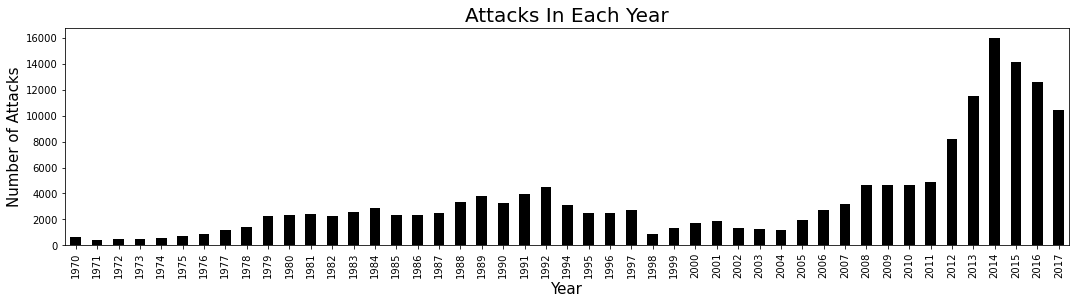

In [18]:
plt.figure(figsize=(18,4))
df_req.Year.value_counts().sort_index().plot(kind='bar',color="black")
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Attacks In Each Year',fontsize=20)
plt.show()

Observations:
 - From 2012, there is signigicant increase in attacks.
 - 2014 was the most affected year by the terrorism

## Most Attacking Groups Of  The Terrorists 

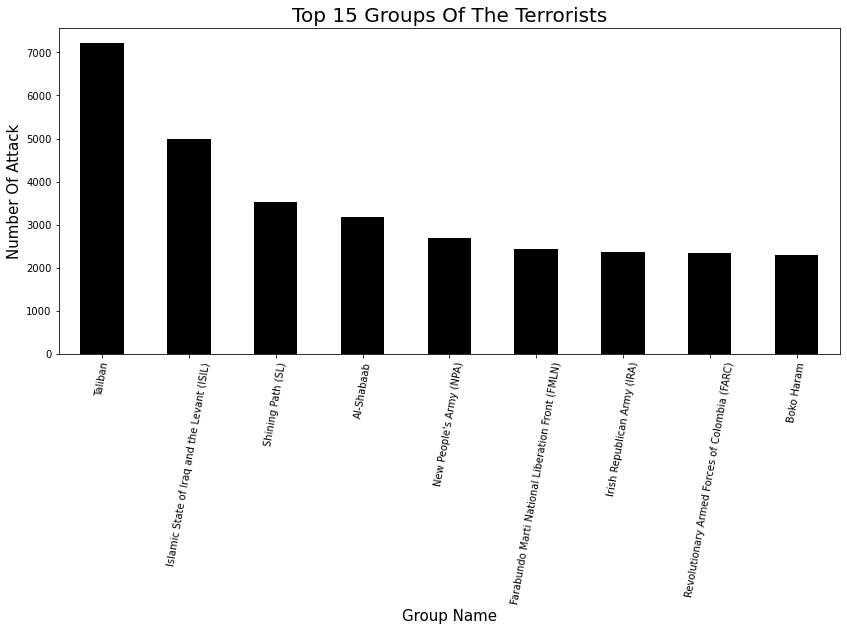

In [19]:
plt.figure(figsize=(14,6))
df_req["Group Name"].value_counts()[1:10].plot(kind='bar',color='black')
plt.xticks(rotation=80)
plt.xlabel('Group Name',fontsize=15)
plt.ylabel('Number Of Attack',fontsize=15)
plt.title('Top 15 Groups Of The Terrorists',fontsize=20)
plt.show()

As we can see the most attacks are done by Taliban over the years

### Most Affected Countries By The Terrorism

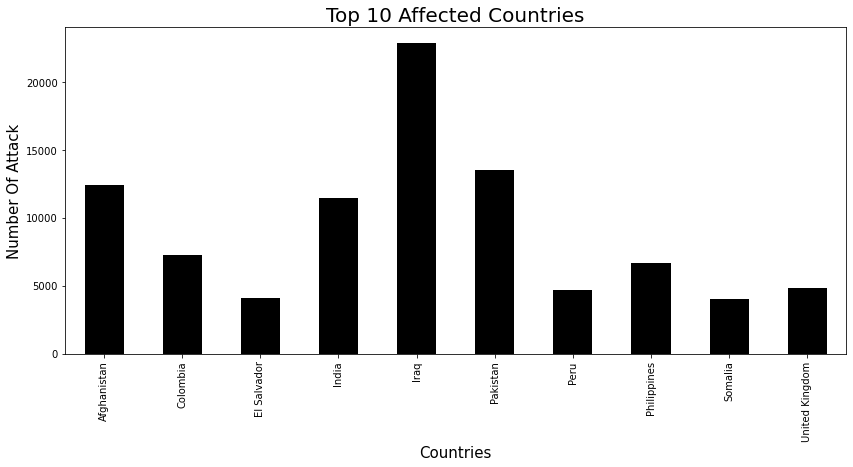

In [20]:
plt.figure(figsize=(14,6))
df_req.Country.value_counts()[0:10].sort_index().plot(kind='bar',color='black')
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Number Of Attack',fontsize=15)
plt.title('Top 10 Affected Countries',fontsize=20)
plt.show()

Observations:
- Iraq is the most affected country by the terrroism
- Pakistan & Afghanistan are the second and third most affected countries
- India is at 4th place in this list

## Most Affected Regions By The Terrorism

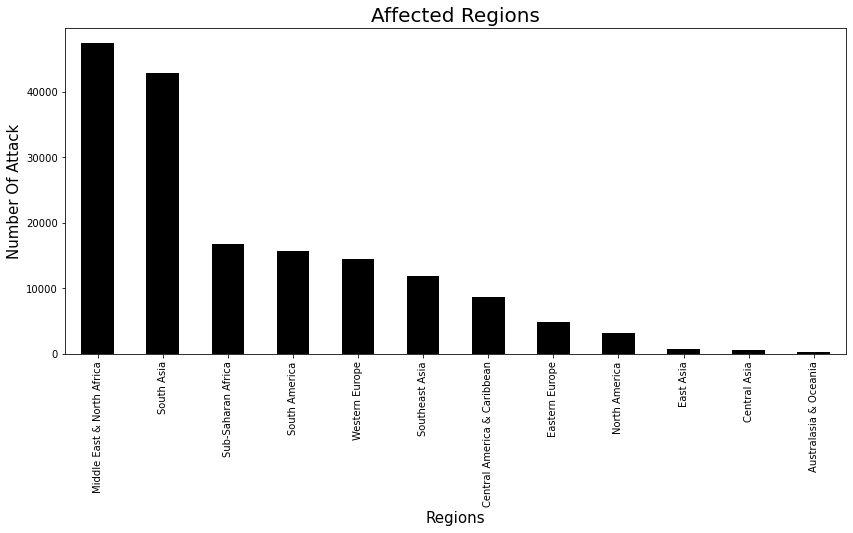

In [21]:
plt.figure(figsize=(14,6))
df_req.Region.value_counts().plot(kind='bar',color='black')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number Of Attack',fontsize=15)
plt.title('Affected Regions',fontsize=20)
plt.show()

Observations:
 - Middle East & North Africa is the most affected region
 - Australasia and Oceania is the less affected region by the terrorism

## Attack Type 

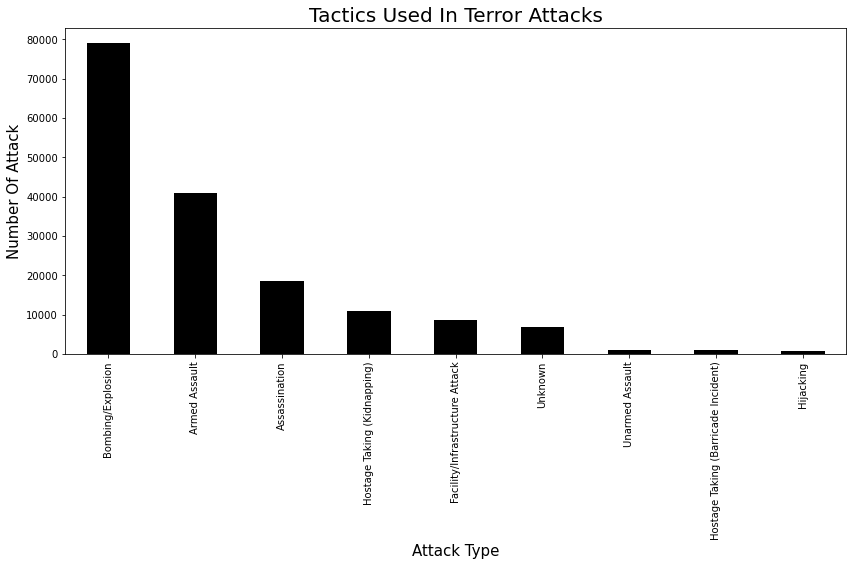

In [22]:
plt.figure(figsize=(14,6))
df_req["AttackType"].value_counts().plot(kind='bar',color='black')
plt.xlabel('Attack Type',fontsize=15)
plt.ylabel('Number Of Attack',fontsize=15)
plt.title('Tactics Used In Terror Attacks',fontsize=20)
plt.show()

Observation:
 - Bombing/Explosion is mostly used tactic in terror attack

## Top-10 Mostly Targeted Communities By The Terrorists 

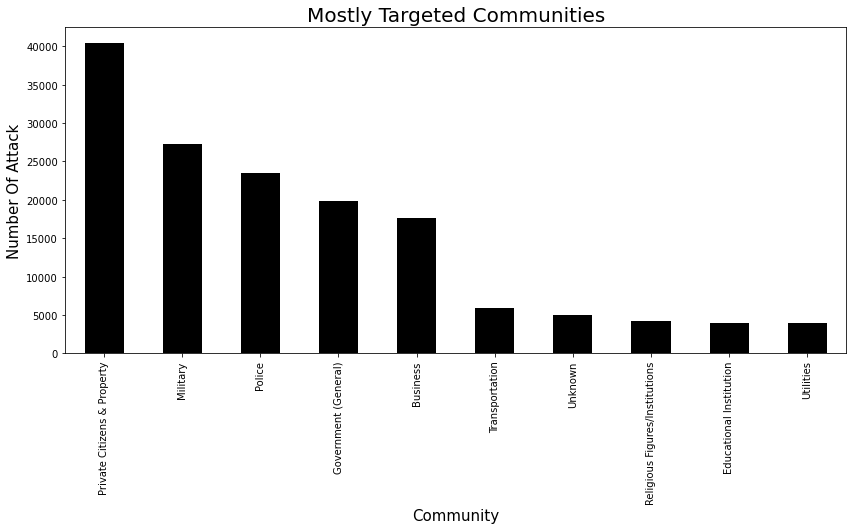

In [23]:
plt.figure(figsize=(14,6))
df_req.TargetType.value_counts()[:10].plot(kind='bar',color='black')
plt.xlabel('Community',fontsize=15)
plt.ylabel('Number Of Attack',fontsize=15)
plt.title('Mostly Targeted Communities',fontsize=20)
plt.show()

- Citizens & Property is the most targeted community by the terrorists

## Top-5 Most Used Weapons

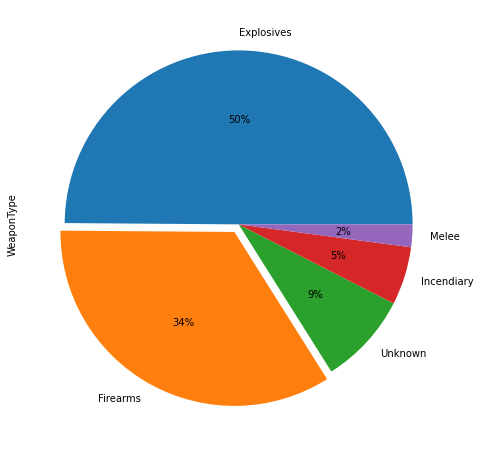

In [24]:
plt.figure(figsize=(20,8))
df_req.WeaponType.value_counts()[:5].plot(kind='pie',explode=[0,0.05,0,0,0],autopct='%1.0f%%')
plt.show()

Observation:
 - Explosives & Firearms are the most used weapons by the terrorist

## People Killed By Terrorists In Every Year

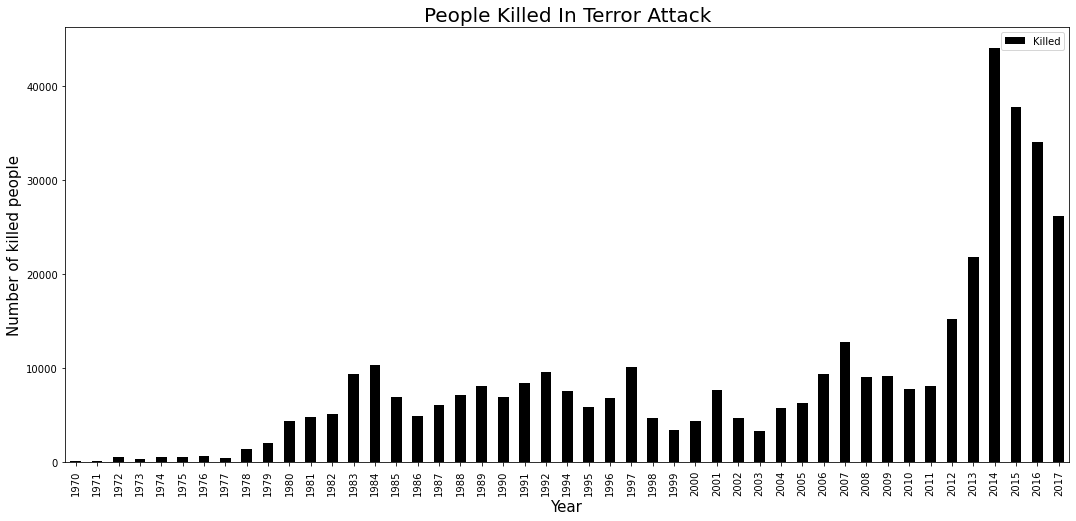

In [25]:
plt.rcParams["figure.figsize"] = (18,8)
df_req[['Year','Killed']].groupby(['Year']).sum().plot(kind='bar',color='black')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of killed people',fontsize=15)
plt.title('People Killed In Terror Attack',fontsize=20)
plt.show()

- In 2014, more people were killed due to terrorist attack

##  Total People Killed In Terrorist Attack

In [26]:
df_req["Killed"].sum()

405210.0

## Countries Which Suffered Most From Terrorism

Country
Iraq           77459.0
Afghanistan    38852.0
Pakistan       23396.0
Nigeria        22183.0
India          19098.0
Sri Lanka      15282.0
Syria          14598.0
Colombia       14037.0
Peru           12529.0
El Salvador    11951.0
Name: Killed, dtype: float64


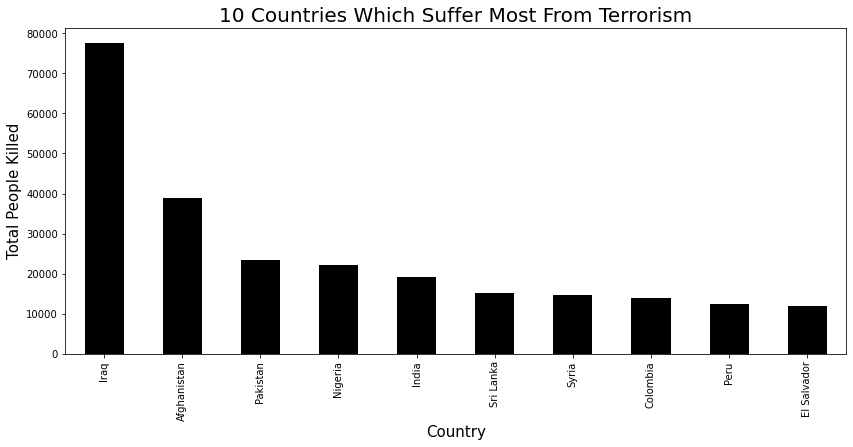

In [27]:
plt.figure(figsize=(14,6))
coun_kill = df_req.groupby(["Country"]).sum()["Killed"]
print(coun_kill.sort_values(ascending=False)[:10])
coun_kill.sort_values(ascending=False)[:10].plot(kind="bar",color='black')


plt.xlabel('Country',fontsize=15)
plt.ylabel('Total People Killed',fontsize=15)
plt.title('10 Countries Which Suffer Most From Terrorism',fontsize=20)
plt.show()

Observations:
- Iraq suffered most from the terrorism over the years
- India comes at 5th position in this list

## Year In Which Cities Suffered Most From Terrorism 

Country
Iraq           77459.0
Afghanistan    38852.0
Pakistan       23396.0
Nigeria        22183.0
India          19098.0
Sri Lanka      15282.0
Syria          14598.0
Colombia       14037.0
Peru           12529.0
El Salvador    11951.0
Name: Killed, dtype: float64


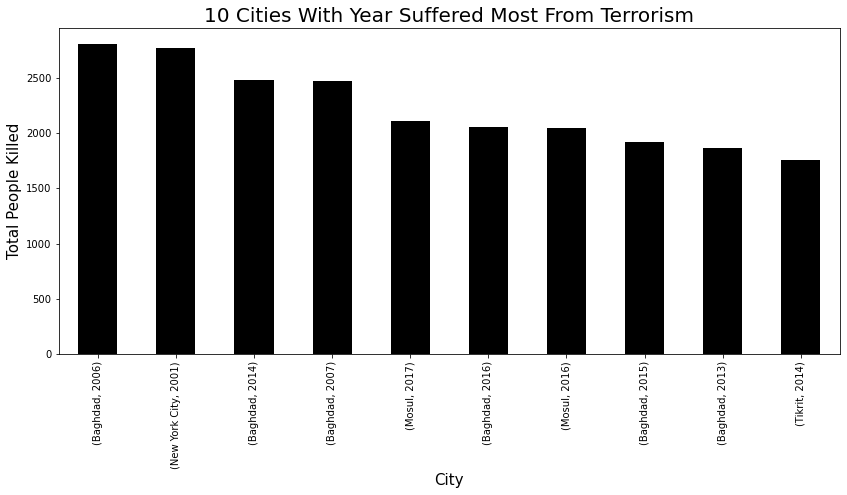

In [28]:
plt.figure(figsize=(14,6))
city_kill = df_req.groupby(["City","Year"]).sum()["Killed"]
print(coun_kill.sort_values(ascending=False)[:10])
city_kill.sort_values(ascending=False)[:10].plot(kind="bar",color='black')

plt.xlabel('City',fontsize=15)
plt.ylabel('Total People Killed',fontsize=15)
plt.title('10 Cities With Year Suffered Most From Terrorism',fontsize=20)
plt.show()

Observations:
- City Baghdad faced most casualties in year 2006
- New York faced high casualties in year 2001 (9/11 attack)

## Terrorism In India

In [29]:
df_india = df_req[df_req["Country"]=='India']
print("Shape of the dataset: " , df_india.shape)
df_india.head()

Shape of the dataset:  (11413, 13)


,Year,Month,Day,Group Name,Country,Region,Provstate,City,AttackType,TargetType,Killed,WeaponType,Wounded
1186,1972,2,22,Palestinians,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0
2764,1975,1,2,Ananda Marga,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,Explosives,0.0
3857,1976,5,26,Unknown,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosives,0.0
5327,1977,9,28,Japanese Red Army (JRA),India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearms,0.0
7337,1979,1,13,Naga People,India,South Asia,Assam,Unknown,Armed Assault,Police,0.0,Firearms,0.0


## 10 Most Attacking Terrorist Groups In India 

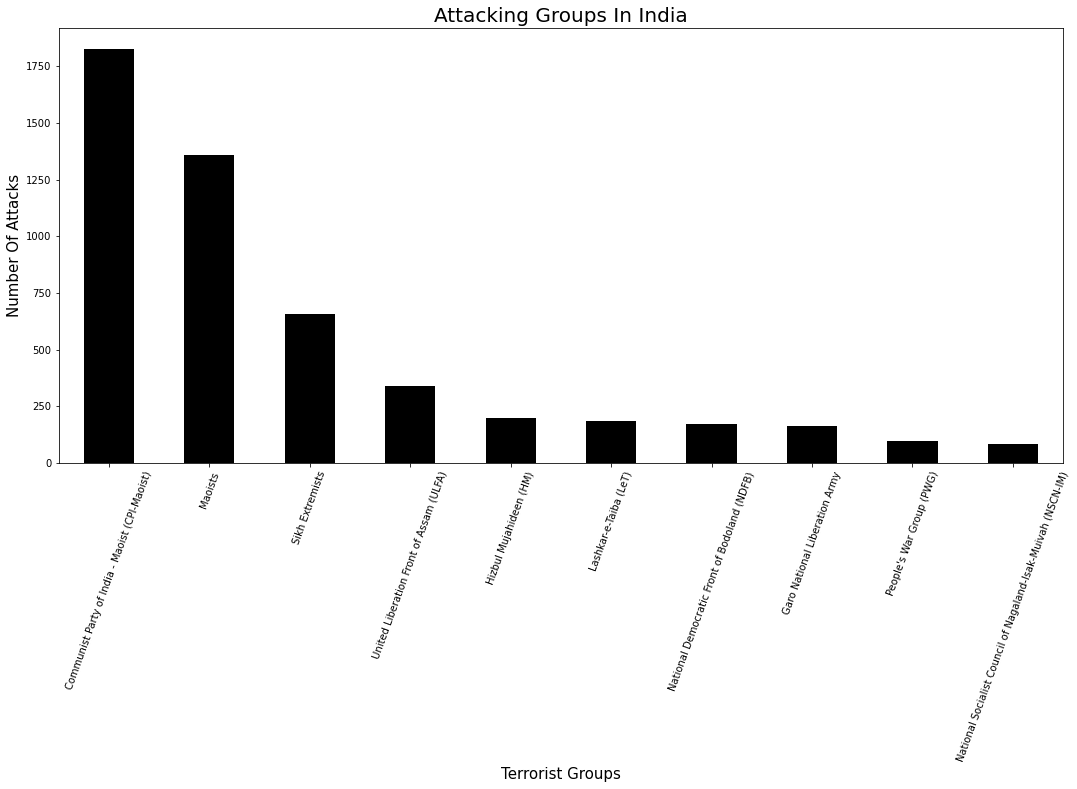

In [30]:
df_india["Group Name"].value_counts()[1:11].plot(kind='bar',color='black')
plt.xticks(rotation=70)

plt.xlabel('Terrorist Groups',fontsize=15)
plt.ylabel('Number Of Attacks',fontsize=15)
plt.title('Attacking Groups In India',fontsize=20)
plt.show()

##### 

## Insights
- From 2012, there is signigicant increase in attacks.
- 2014 was the most affected year by the terrorism
- Most terrorist attacks are done by the Taliban
- Iraq is the most affected country by the terrroism
- Pakistan & Afghanistan are the second and third most affected countries
- India is at 4th place in this list
- Middle East & North Africa is the most affected region
- Australasia and Oceania is the less affected region by the terrorism
- Bombing/Explosion is mostly used tactic in terror attack
- Citizens & Property is the most targeted community by the terrorists
- Explosives & Firearms are the most used weapons by the terrorist
- In 2014, more people were killed due to terrorist attack
- Total 405210 people killed by the terrorists as per dataset
- City Baghdad faced most casualties in year 2006
- New York faced high casualties in year 2001 (9/11 attack)

##### 

##### 